## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.pipeline import Pipeline as ImbPipeline

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
data="../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv"
call_data= pd.read_csv(data)
call_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
training_data, testing_data = train_test_split(call_data, test_size=0.3, random_state=42)
training_data.drop(columns='RecordID', inplace=True) 
training_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,Dendrobatidae,Ameerega,Ameeregatrivittata
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,Hylidae,Hypsiboas,HypsiboasCinerascens
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,Hylidae,Hypsiboas,HypsiboasCinerascens
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,Hylidae,Hypsiboas,HypsiboasCinerascens
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,Hylidae,Hypsiboas,HypsiboasCinerascens


### (b) Train a classifier for each label

#### (i) Research

Hamming Loss is used as a performance metric in the context of multi-label classification to gauge the proportion of incorrectly assigned labels across the entire set of labels in the dataset.
In more technical terms, Hamming Loss calculates the average rate of wrong labels per sample, considering any label that is incorrectly included or omitted by the classifier as incorrect.

Exact Match is an evaluation metric for assessing the accuracy of a multi-label classifier, where the prediction is deemed accurate only when all labels are correctly identified for a given sample.
To elaborate, Exact Match represents the ratio of samples that have all their associated true labels precisely predicted by the classifier. It means that a sample is only counted as accurately labeled if every label assigned by the classifier corresponds exactly to the true labels.

In [4]:
def calculate_hamming(y_true, y_pred):
    l_hl=[]
    l_em=[]
    
    for i in range(len(y_true.columns)):
        emr = accuracy_score(y_true.iloc[:,i], y_pred.iloc[:,i])
        hlv = hamming_loss(y_true.iloc[:,i], y_pred.iloc[:,i])
        l_hl.append(hlv)
        l_em.append(emr)
        #hamming_score = 1 - hamming_loss_value
    print("Hamming loss value is : ", round(sum(l_hl)/len(l_hl),4))
    print("Exact match raio is: ", round(sum(l_em)/len(l_em),4))
    #print("hamming_score: ", hamming_score)
    
    return emr, hlv


#### (ii) Train a SVM for each of the labels

In [5]:
X= training_data.iloc[:, :-3]
y=training_data.iloc[:, -3:]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
def svm_model(train_x,train_y,test_x):
    best_params={}
    svm_c={}
    y_pred_l={}
    score_dic={}
    svm_classifiers = []
    svm_model = SVC(kernel='rbf')
    param_grid = {'C':[0.1, 1, 10, 100],'gamma':[0.01, 0.1, 1, 10]}

    for i in range(train_y.shape[1]): 

        gs= GridSearchCV(svm_model, param_grid, cv=10, scoring='accuracy')
        gs.fit(train_x,train_y.iloc[:, i])

        best_params[i]= gs.best_params_
        best_C= best_params[i]['C']
        best_gamma= best_params[i]['gamma']

        svm_best= SVC(kernel='rbf', C=best_C, gamma=best_gamma)
        svm_best.fit(train_x, train_y.iloc[:, i])
        svm_c[i]=svm_best 
        classifier=svm_c[i]
        
        y_pred= classifier.predict(test_x)
        y_pred_l[i]= y_pred
        
    return best_params, y_pred_l

In [7]:
def renaming_col(y_pred_label):
    df1= pd.DataFrame(y_pred_label)
    df1.rename(columns={0: 'Family', 1: 'Genus', 2: 'Species'}, inplace=True)

    return df1

In [8]:
best_params, y_pred_label= svm_model(train_x,train_y,test_x)
best_parameters=renaming_col(best_params)
best_parameters

,Family,Genus,Species
C,10,10,100
gamma,1,1,1


In [9]:
df1=renaming_col(y_pred_label)
a,b=calculate_hamming(test_y, df1)

Hamming loss value is :  0.0201
Exact match raio is:  0.9799


In [10]:
std_scaler= StandardScaler()
std_train_x= std_scaler.fit_transform(train_x)
std_test_x= std_scaler.fit_transform(test_x)

best_params, y_pred_l= svm_model(std_train_x,train_y,std_test_x)
best_parameters=renaming_col(best_params)
best_parameters

,Family,Genus,Species
C,10.0,100.00,10.00
gamma,0.1,0.01,0.01


In [11]:
df1=renaming_col(y_pred_l)
a,b=calculate_hamming(test_y, df1)

Hamming loss value is :  0.0221
Exact match raio is:  0.9779


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [12]:
def svm_model_linear(train_x, train_y, test_x):
    best_params = {}
    y_pred_l= {}

    param_grid = {'C':[0.1, 1, 10, 100] }

    for i in range(train_y.shape[1]):
       
        gs= GridSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=10000), param_grid, cv=10, scoring='accuracy')
        gs.fit(train_x, train_y.iloc[:, i])

        best_params[i]= gs.best_params_
        best_svm_model= gs.best_estimator_
        best_svm_model.fit(train_x, train_y.iloc[:, i])
        
        y_pred= best_svm_model.predict(test_x)
        y_pred_l[i] = y_pred
        
    return best_params, y_pred_l

In [13]:
best_params, y_pred_l= svm_model_linear(std_train_x,train_y,std_test_x)
best_parameters=renaming_col(best_params)
best_parameters

,Family,Genus,Species
C,10,100,10


In [14]:
df1=renaming_col(y_pred_l)
a,b=calculate_hamming(test_y, df1)

Hamming loss value is :  0.0615
Exact match raio is:  0.9385


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [22]:
def svm_model_with_smote(train_x, train_y, test_x):
    best_params= {}
    y_pred_l= {}

    param_grid= {'svm__C':[0.1,1,10,100]}

    pipeline= ImbPipeline([
        ('smote',SMOTE(random_state=42)),
        ('svm',LinearSVC(penalty='l1',dual=False,max_iter=10000))])

    for i in range(train_y.shape[1]):
       
        gs= GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
        gs.fit(train_x, train_y.iloc[:, i])

        best_params[i]= gs.best_params_
        best_svm= gs.best_estimator_.named_steps['svm']
        smote_x, smote_y= SMOTE(random_state=42).fit_resample(train_x, train_y.iloc[:, i])
        best_svm.fit(smote_x, smote_y)

        y_pred= gs.predict(test_x)
        y_pred_l[i]= y_pred
        
    return best_params, y_pred_l

In [23]:
best_params, y_pred_l= svm_model_with_smote(std_train_x,train_y,std_test_x)
best_parameters=renaming_col(best_params)
best_parameters

,Family,Genus,Species
svm__C,10,100,1


In [24]:
df1=renaming_col(y_pred_l)
a,b=calculate_hamming(test_y, df1)

Hamming loss value is :  0.073
Exact match raio is:  0.927


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

### (b) Determine which family is the majority

In [25]:
def calculate_label(best_k,y,cl):
    y['Cluster']= cl
    mf= []
    mg= []
    ms= []
    clust_l= []
    
    for c in range(best_k):
        clust_l.append(c)
        cluster_data= y[y['Cluster']==c]

        mf.append(cluster_data['Family'].value_counts().idxmax())
        mg.append(cluster_data['Genus'].value_counts().idxmax())
        ms.append(cluster_data['Species'].value_counts().idxmax())
        
    df_majority= pd.DataFrame({'Family': mf,'Genus': mg,'Species': ms, 'Cluster': clust_l,})

    return df_majority


In [26]:
def calculate_hamming(best_k,majority_df, cl):
    mcl_l= 0
    for c in range(best_k):
        ind,= np.where(cl==c)
        for i in y.loc[ind].values:
            mc= (i!=majority_df.loc[c].values)     
            mcl_l+= np.sum(mc)
    hd= mcl_l / y.shape[0]
    hl= mcl_l / (y.shape[0] * y.shape[1])
    return hd, hl

In [27]:
y.reset_index(drop=True, inplace=True)

In [28]:
s_scores= []
best_k= 0
best_score= -1
hd_l= []
hl_l=[]
n=50
for i in range(n): 
    print(" For Iteration number:", i+1)
    
    for k in range(2, n+1):
        km_model= KMeans(n_clusters=k)
        cl= km_model.fit_predict(X)
    
        s_avg= silhouette_score(X, cl)
        s_scores.append(s_avg)
    
        if s_avg > best_score:
            best_k= k
            best_score= s_avg

    print("Best k:", best_k)
    
    km_model= KMeans(n_clusters=best_k)
    cl= km_model.fit_predict(X)
    ml_df=calculate_label(best_k,y,cl)
    display(ml_df)
    
    hd, hl=calculate_hamming(best_k,ml_df,cl)
    hd_l.append(hd)
    hl_l.append(hl)
    print("Hamming Distance is: ",round(hd, 4))
    print(" ")
    print("Hamming Loss is: ",round(hl, 4))
    print(" ")

 For Iteration number: 1
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 2
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 3
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCordobae,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 4
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 5
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCinerascens,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 6
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCinerascens,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 7
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCordobae,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 8
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 9
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 10
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCordobae,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 11
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 12
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 13
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 14
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCordobae,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 15
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 16
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 17
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 18
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCinerascens,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 19
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCordobae,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,2
3,Leptodactylidae,Adenomera,AdenomeraAndre,3


Hamming Distance is:  0.7288
 
Hamming Loss is:  0.1822
 
 For Iteration number: 20
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 21
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCinerascens,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 22
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCordobae,0
1,Dendrobatidae,Ameerega,Ameeregatrivittata,1
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 23
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 24
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraAndre,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.7288
 
Hamming Loss is:  0.1822
 
 For Iteration number: 25
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Dendrobatidae,Ameerega,Ameeregatrivittata,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 26
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCinerascens,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 27
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCinerascens,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 28
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCordobae,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 29
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraAndre,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.7288
 
Hamming Loss is:  0.1822
 
 For Iteration number: 30
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCinerascens,0
1,Dendrobatidae,Ameerega,Ameeregatrivittata,1
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 31
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 32
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCordobae,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 33
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 34
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCinerascens,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 35
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCinerascens,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Leptodactylidae,Adenomera,AdenomeraAndre,3


Hamming Distance is:  0.6958
 
Hamming Loss is:  0.1739
 
 For Iteration number: 36
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCordobae,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 37
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Dendrobatidae,Ameerega,Ameeregatrivittata,1
2,Hylidae,Hypsiboas,HypsiboasCinerascens,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 38
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 39
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCinerascens,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 40
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Dendrobatidae,Ameerega,Ameeregatrivittata,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 41
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCinerascens,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 42
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 43
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCinerascens,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 44
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCinerascens,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 45
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 46
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCinerascens,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCordobae,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 47
Best k: 4


,Family,Genus,Species,Cluster
0,Dendrobatidae,Ameerega,Ameeregatrivittata,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 48
Best k: 4


,Family,Genus,Species,Cluster
0,Hylidae,Hypsiboas,HypsiboasCinerascens,0
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 49
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCordobae,1
2,Dendrobatidae,Ameerega,Ameeregatrivittata,2
3,Hylidae,Hypsiboas,HypsiboasCinerascens,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 
 For Iteration number: 50
Best k: 4


,Family,Genus,Species,Cluster
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,0
1,Hylidae,Hypsiboas,HypsiboasCinerascens,1
2,Hylidae,Hypsiboas,HypsiboasCordobae,2
3,Dendrobatidae,Ameerega,Ameeregatrivittata,3


Hamming Distance is:  0.6529
 
Hamming Loss is:  0.1632
 


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [29]:
print("Average Hamming Distance: ",round(np.mean(hd_l), 4))
print( "Std Devation for hamming distance: ", round(np.std(hd_l), 4))

Average Hamming Distance:  0.6583
Std Devation for hamming distance:  0.0188


In [30]:
print("Average Hamming Loss:",round(np.mean(hl_l), 4))
print( "Std Devation for hamming loss: ", round(np.std(hl_l), 4))

Average Hamming Loss: 0.1646
Std Devation for hamming loss:  0.0047


In [31]:
print("Average Hamming Score: ",round(1-np.mean(hl_l), 4))

Average Hamming Score:  0.8354


## 3. ISLR 12.6.2

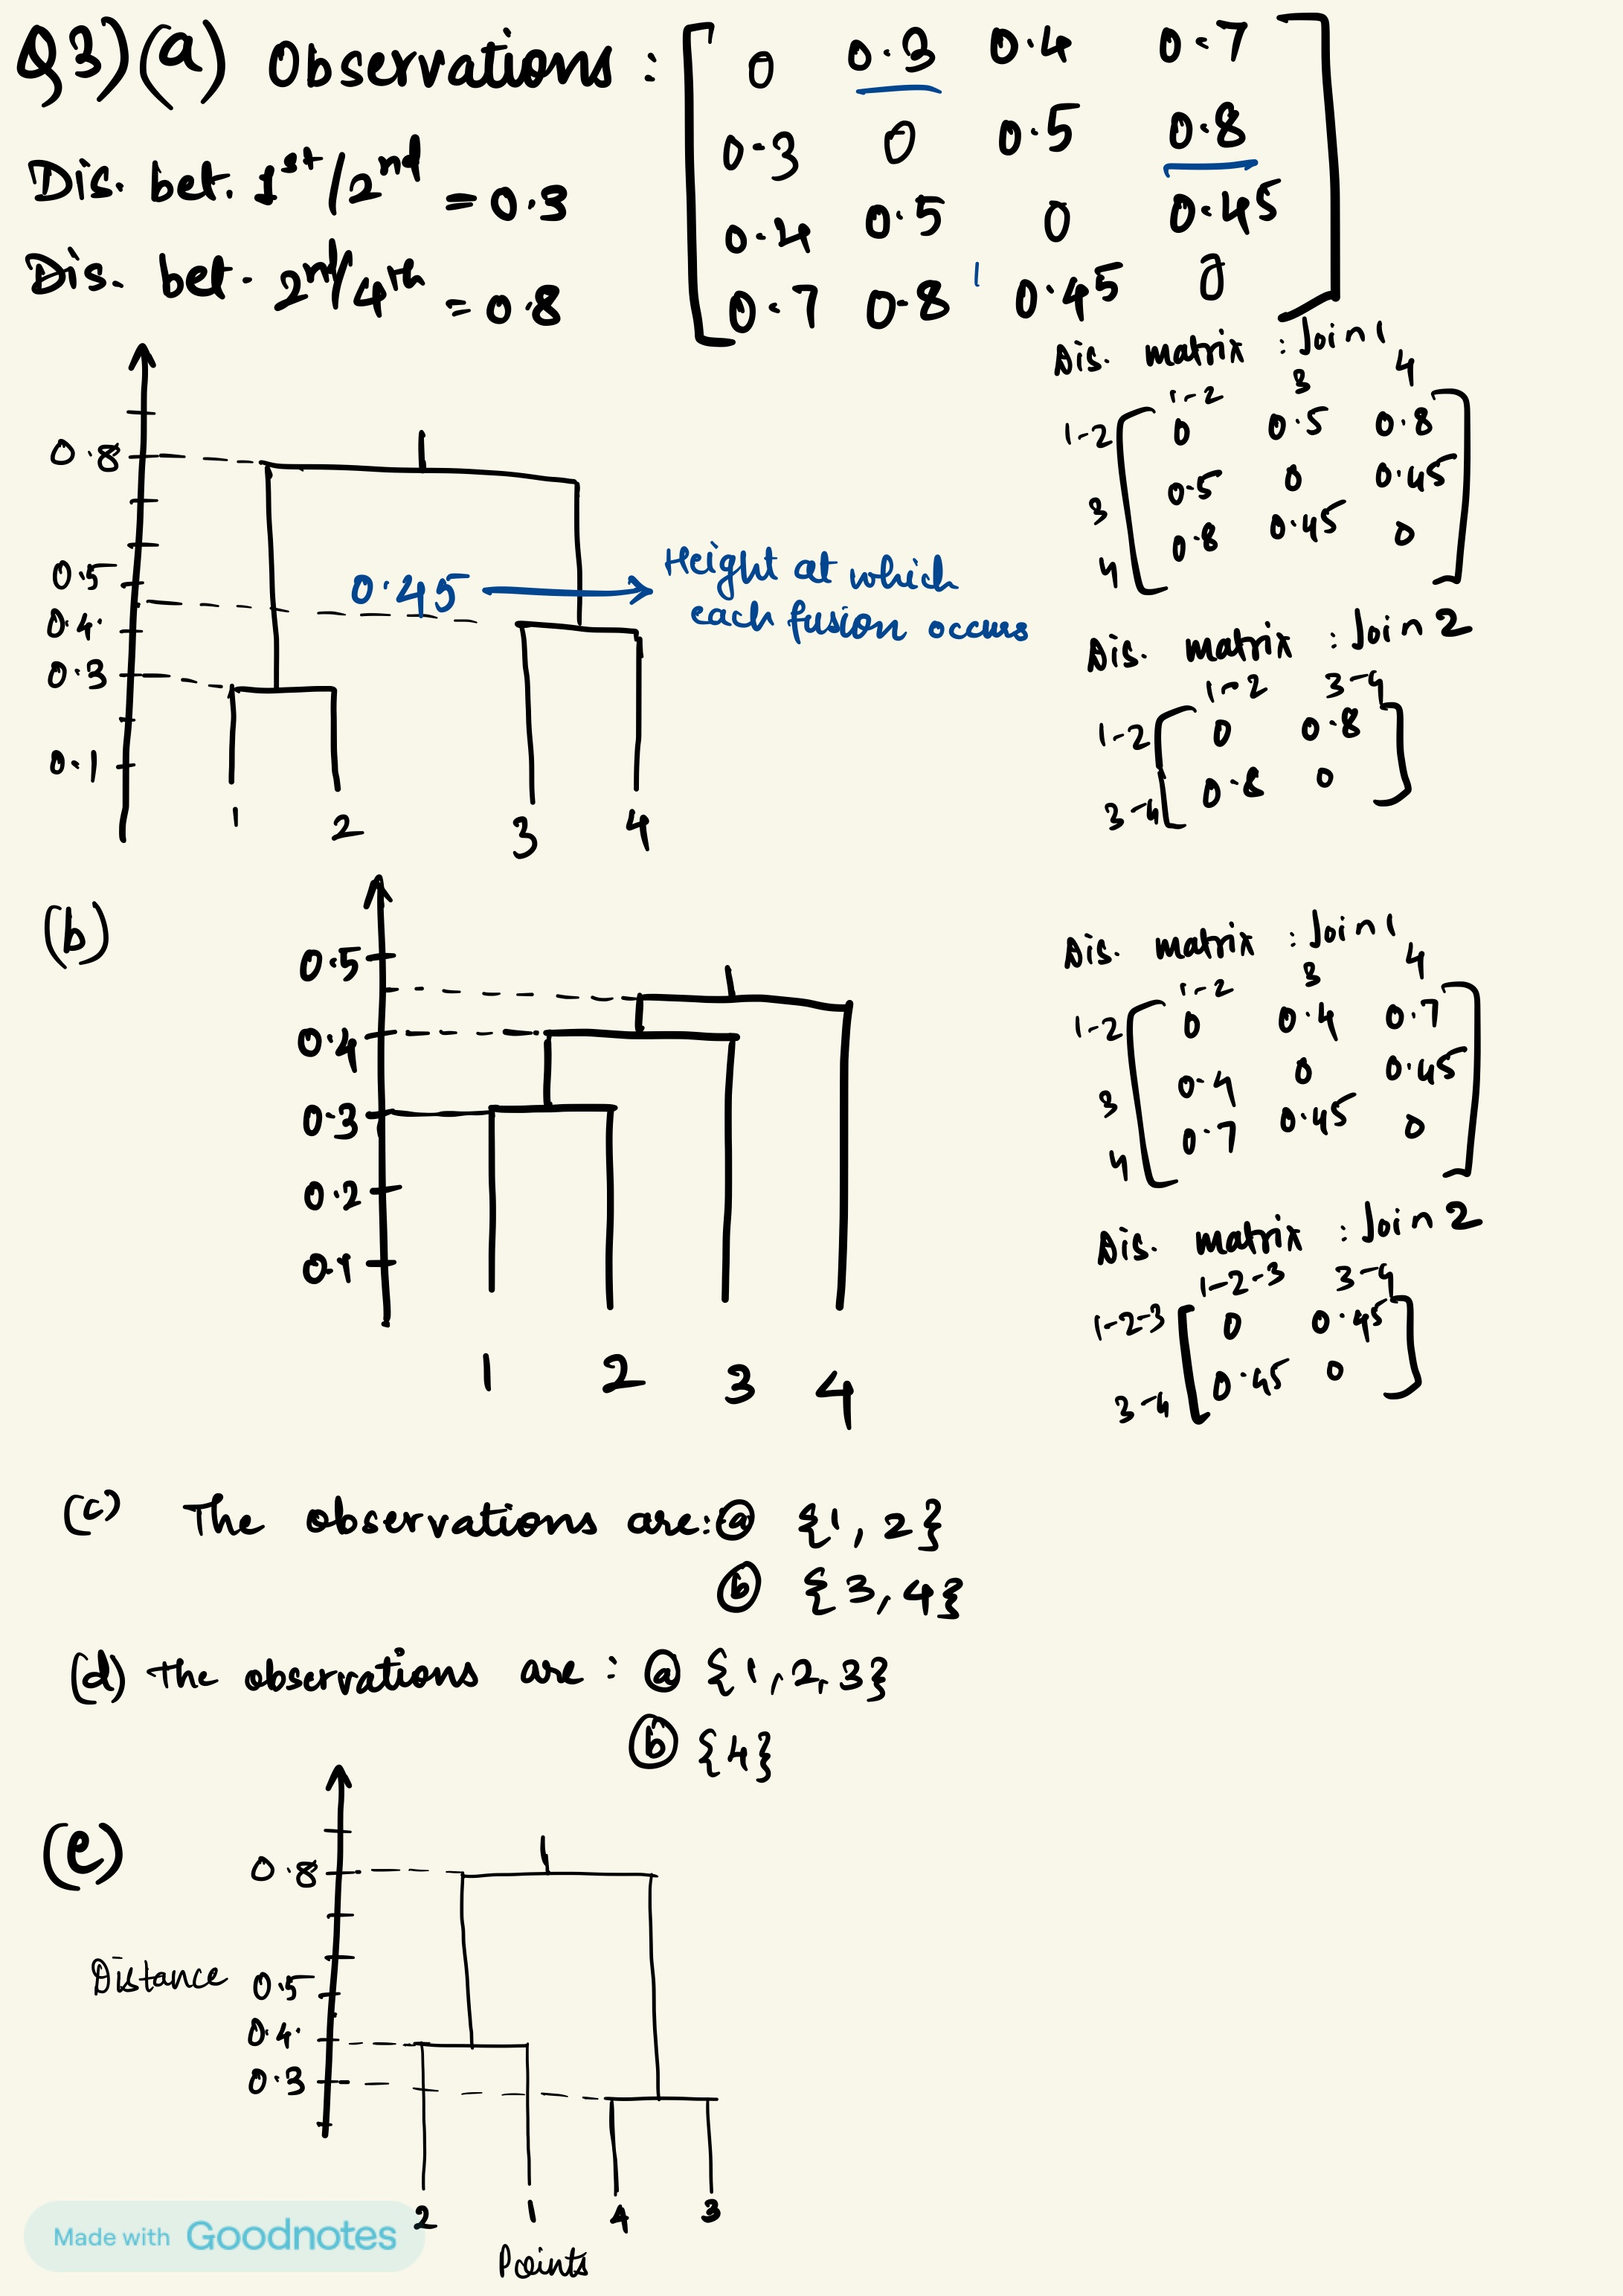